In [116]:
from enfify.synthetic_signals import func_ENF_synthesis_corrupted_harmonic
import numpy as np
import matplotlib.pyplot as plt
from enfify.preprocessing import fir_bandpass_filter, cut_signal

from enfify.enf_estimation import (
    segmented_freq_estimation_DFT1,
    STFT,
    segmented_phase_estimation_DFT1,
)

In [117]:
fundamental_f = 50
harmonic_index = np.array([1, 2, 3, 4, 5, 6])
corrupted_index  = np.array([4, 5, 6])
duration = 10
fs = 1000
corrup = False

sig, enf_freqs, sig_harmonics = func_ENF_synthesis_corrupted_harmonic(fundamental_f, harmonic_index, corrupted_index, duration, fs, corrup)

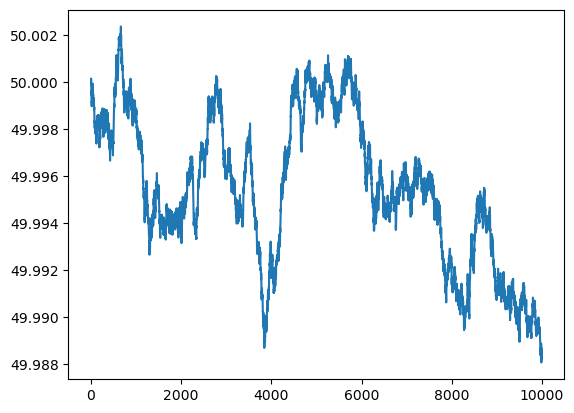

In [118]:
enf_freqs[0]

plt.plot(enf_freqs[0])
plt.show()

cut_start = 4*fs
cut_len = 10
cut_sig = cut_signal(sig, cut_start, cut_len)

In [119]:
nominal_enf = 50
deltaf = 0.6
N = 1000
bandpass_sig_cut = fir_bandpass_filter(cut_sig, fs, nominal_enf, deltaf, N)
bandpass_sig = fir_bandpass_filter(sig, fs, nominal_enf, deltaf, N)

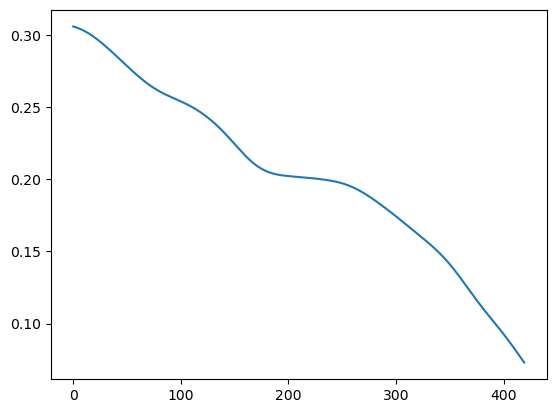

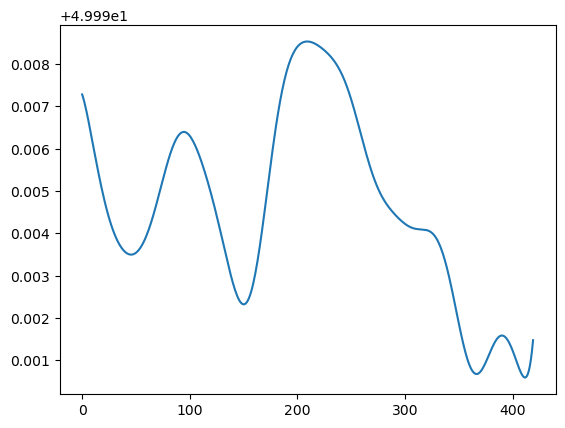

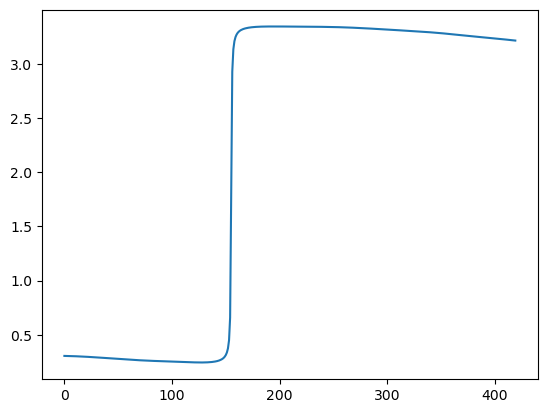

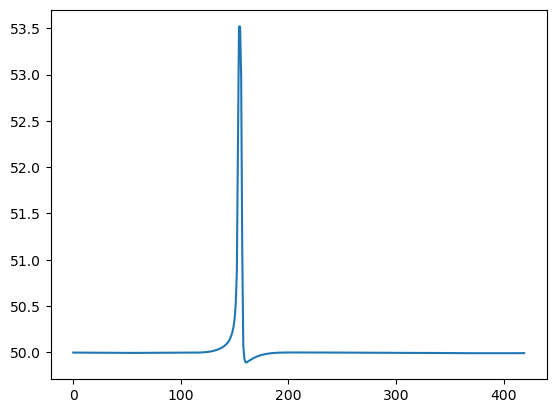

In [120]:
N_DFT = 20_000
step_size = 0.02
window_len = 0.2

phases = segmented_phase_estimation_DFT1(bandpass_sig, fs, nominal_enf, N_DFT, step_size, window_len)
freqs = segmented_freq_estimation_DFT1(bandpass_sig, fs, N_DFT, step_size, window_len)

phases_cut = segmented_phase_estimation_DFT1(bandpass_sig_cut, fs, nominal_enf, N_DFT, step_size, window_len)
freqs_cut = segmented_freq_estimation_DFT1(bandpass_sig_cut, fs, N_DFT, step_size, window_len)

plt.plot(phases[40:-40])
plt.show()

plt.plot(freqs[40:-40])
plt.show()

plt.plot(phases_cut[40:-40])
plt.show()

plt.plot(freqs_cut[40:-40])
plt.show()